In [1]:
import os
from PyPDF2 import PdfReader
from pdf2image import convert_from_path

def pdf_to_image(pdf_path, image_path):
    images = convert_from_path(pdf_path)
    for i, image in enumerate(images):
        image.save(f"{image_path}.png", "PNG")

if __name__ == "__main__":
    pdf_file_path ="dataset/Social_Networks_Bhavya_Jha.pdf"
    image_output_path = "certificate"  

    if not os.path.exists(image_output_path):
        os.makedirs(image_output_path)

    pdf_to_image(pdf_file_path, image_output_path)


In [37]:
import pytesseract
from PIL import Image

image = Image.open('certificate.png')

soureceText = pytesseract.image_to_string(image)

soureceTextData = [line for line in soureceText.split('\n') if len(line.strip()) > 1]
print(soureceTextData)
print(len(soureceTextData))



['This certificate is computer generated and can be verified by scanning the QR code given below. This will display the', 'certificate from the NPTEL repository, https://nptel.ac.in/noc/', 'Roll No: NPTEL21CS31S13350029', 'BHAVYA JHA', '1-103 AWHO PARAMESHWARAN VIHAR', 'SALIGRAMAM, 67 ARCOT ROAD', 'CHENNAI', 'TAMIL NADU - 600093', 'PH. NO :8778294632', 'Score Type of Certificate', '>=90 Elite+Gold', '75-89 Elite+Silver', '>=60 Elite', '40-59 = |Successfully Completed', '<40 No Certificate', 'No. of credits recommended by NPTEL:3', 'An additional 1 credit may be awarded if the University deems it fit, based on the actual student effort involved.', 'Wy', 'Si', 'f = NPTEL Online Certification', 'orf (Funded by the Ministry of HRD, Govt. of India)', 'This certificate is awarded to', 'BHAVYA JHA', 'for successfully completing the course', 'Social Networks', 'with a consolidated score of 90 %', 'Online Assignments | 25/25 | Proctored Exam | 64.5/75', 'Total number of candidates certified in 

QR Code Data: https://nptel.ac.in/noc/E_Certificate/NPTEL21CS31S13350029106421


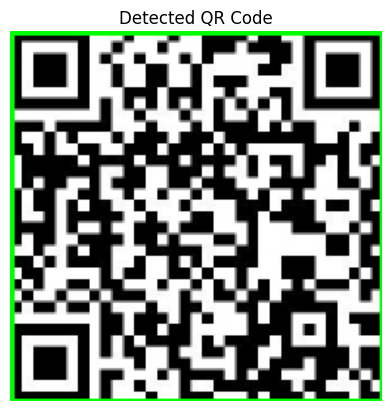

In [3]:
import cv2
from pyzbar.pyzbar import decode
import matplotlib.pyplot as plt

# Load the exam certificate image
image = cv2.imread('certificate.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect QR codes in the image
decoded_objects = decode(gray_image)
url = ""
# Iterate over detected QR codes
for obj in decoded_objects:
    # Extract the QR code data
    url = obj.data.decode('utf-8')
    print("QR Code Data:", url)

    # Draw a rectangle around the QR code
    (x, y, w, h) = obj.rect
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Crop the region containing the QR code
    qr_code = image[y:y+h, x:x+w]

# Convert QR code image from BGR to RGB format (required by Matplotlib)
qr_code_rgb = cv2.cvtColor(qr_code, cv2.COLOR_BGR2RGB)

# Display the QR code image using Matplotlib
plt.imshow(qr_code_rgb)
plt.title('Detected QR Code')
plt.axis('off')
plt.show()


In [4]:
import requests

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract filename from the URL
    filename = url.split("/")[-1]

    # Save the content to a file
    with open(filename, 'wb') as f:
        f.write(response.content)
    print("File downloaded successfully as:", filename)
else:
    print("Failed to download file. Status code:", response.status_code)


File downloaded successfully as: NPTEL21CS31S13350029106421


In [5]:
from selenium import webdriver

def take_screenshot(url, save_path):
    # Set up the browser
    options = webdriver.ChromeOptions()
    options.add_argument('headless')  # Run in headless mode, no browser window will be opened
    driver = webdriver.Chrome(options=options)
    
    try:
        # Open the URL
        driver.get(url)
        
        # Take screenshot and save it
        driver.save_screenshot(save_path)
        print(f"Screenshot saved to {save_path}")
    except Exception as e:
        print(f"Error: {e}")
    finally:
        # Close the browser
        driver.quit()

# Example usage:
url = "https://archive.nptel.ac.in/noc/Ecertificate/?q=NPTEL21CS31S13350029106421"
save_path = "screenshot.png"
take_screenshot(url, save_path)


There was an error managing chromedriver (error sending request for url (https://googlechromelabs.github.io/chrome-for-testing/last-known-good-versions-with-downloads.json): error trying to connect: Connection reset by peer (os error 104)); using driver found in the cache
There was an error managing chrome; using browser found in the cache


Screenshot saved to screenshot.png


In [6]:

from selenium import webdriver

def take_screenshot(url, save_path, width, height):
    # Set up the browser
    options = webdriver.ChromeOptions()
    options.add_argument('headless')  # Run in headless mode, no browser window will be opened
    driver = webdriver.Chrome(options=options)
    
    try:
        # Set window size
        driver.set_window_size(width, height)
        
        # Open the URL
        driver.get(url)
        
        # Take screenshot and save it
        driver.save_screenshot(save_path)
        print(f"Screenshot saved to {save_path}")
    except Exception as e:
        print(f"Error: {e}")
    finally:
        # Close the browser
        driver.quit()

# Example usage:
url = "https://archive.nptel.ac.in/noc/Ecertificate/?q=NPTEL21CS31S13350029106421"
save_path = "screenshot.png"
width = 2500
height = 1500  
take_screenshot(url, save_path, width, height)


Screenshot saved to screenshot.png


In [35]:
import pytesseract
from PIL import Image

image = Image.open(save_path)

targetTextLabel = pytesseract.image_to_string(image)

print(targetTextLabel)


 

This certificate is computer generated and can be verified by scanning the QR code given below. This will display the
certificate from the NPTEL repository, https://nptel.ac.in/noc/

 

Roll No: NPTEL21CS31S13350029
To,

BHAVYA JHA

1-103 AWHO PARAMESHWARAN VIHAR.
SALIGRAMAM, 67 ARCOT ROAD
CHENNAI

TAMIL NADU - 600093,

PH. NO :8778294632

 

 

 

Score | Type of Certificate

 

 

 

>=90 Elite+Gold
75-89 Elite+Silver
>=60 Elite

 

40-59 [Successfully Completed
<0 No Certificate

 

 

 

 

No. of credits recommended by NPTEL:3

al 1 credit may be awarded if the University deems it fit, based on the actual student effort involved.

 

    

NPTEL Online Certification

(Funded by the Ministry of HRD, Govt. of India)

 

This certificate is awarded to

BHAVYA JHA
‘for successfully completing the course

 

Social Networks

with a consolidated score of 90 %
Online Assignments | 25/25 | Proctored Exam | 64.5/75

 

 

 

 

 

 

 

Total number of candidates certified in this cours

In [24]:
data = targetTextLabel.split('\n')
dataDup = targetTextLabel.split('\n')
print(len(data))
for i in range(len(data)):
    if(data[i] == "" or data[i] == " "):
        data.pop(i)

print(data)

110


IndexError: pop index out of range

In [34]:
targetData = [line for line in targetTextLabel.split('\n') if len(line.strip()) > 1]
print(targetData)
print(len(targetData))


['This certificate is computer generated and can be verified by scanning the QR code given below. This will display the', 'certificate from the NPTEL repository, https://nptel.ac.in/noc/', 'Roll No: NPTEL21CS31S13350029', 'To,', 'BHAVYA JHA', '1-103 AWHO PARAMESHWARAN VIHAR.', 'SALIGRAMAM, 67 ARCOT ROAD', 'CHENNAI', 'TAMIL NADU - 600093,', 'PH. NO :8778294632', 'Score | Type of Certificate', '>=90 Elite+Gold', '75-89 Elite+Silver', '>=60 Elite', '40-59 [Successfully Completed', '<0 No Certificate', 'No. of credits recommended by NPTEL:3', 'al 1 credit may be awarded if the University deems it fit, based on the actual student effort involved.', 'NPTEL Online Certification', '(Funded by the Ministry of HRD, Govt. of India)', 'This certificate is awarded to', 'BHAVYA JHA', '‘for successfully completing the course', 'Social Networks', 'with a consolidated score of 90 %', 'Online Assignments | 25/25 | Proctored Exam | 64.5/75', 'Total number of candidates certified in this course: 537', 'De